In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker

In [2]:
import statsmodels.formula.api as smf

In [3]:
src_file = Path.cwd() / 'data' / 'raw' / 'EPA_fuel_economy.csv'
image_dir = Path.cwd() / 'images'
df = pd.read_csv(src_file)
avg_by_year = df.groupby(['year'], as_index=False).agg({'fuelCost08': 'mean'}).round(2)
avg_by_year

,year,fuelCost08
0,2000,2184.94
1,2001,2201.48
2,2002,2229.38
3,2003,2273.99
4,2004,2264.57
5,2005,2271.01
6,2006,2287.00
7,2007,2284.15
8,2008,2285.68
9,2009,2183.23


In [4]:
mpg_model = smf.ols('fuelCost08 ~ year', data=avg_by_year).fit()

In [5]:
print(mpg_model.summary())

                            OLS Regression Results                            
Dep. Variable:             fuelCost08   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.69
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           5.79e-08
Time:                        09:48:19   Log-Likelihood:                -118.43
No. Observations:                  21   AIC:                             240.9
Df Residuals:                      19   BIC:                             242.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.659e+04   5182.756      8.990      0.0

(1800.0, 2200.0)

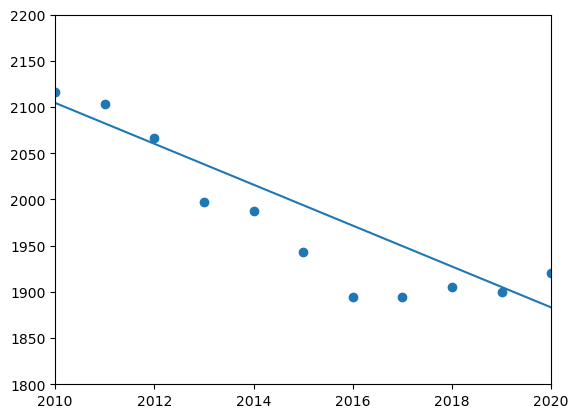

In [6]:
fig, ax1 = plt.subplots()
ax1.scatter(x=avg_by_year['year'], y=avg_by_year['fuelCost08'])
ax1.plot(avg_by_year['year'], mpg_model.fittedvalues)
ax1.set_xlim((2010,2020))
ax1.set_ylim((1800,2200))

### Multiple plot

In [7]:
# 
df_2010 = df.query('year >= 2010').copy()
avg_fuel_cost = df_2010['fuelCost08'].mean().round(0)
avg_fuel_cost

1970.0

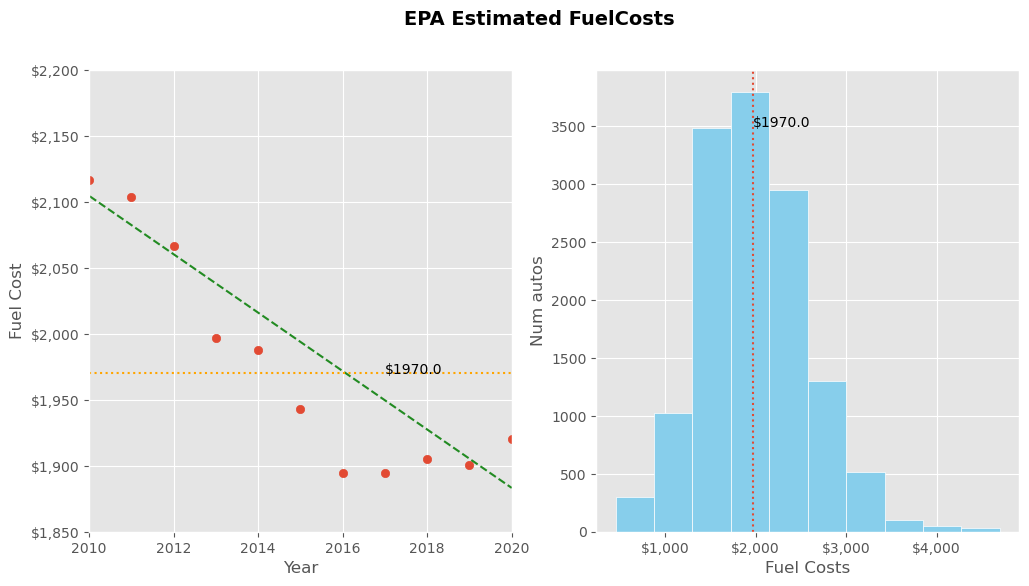

In [9]:
mpl.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               figsize=(12,6))

ax1.scatter(x=avg_by_year['year'], 
            y=avg_by_year['fuelCost08'])
ax1.plot(avg_by_year['year'], 
         mpg_model.fittedvalues, 
         color='forestgreen', linestyle='--')
ax1.set(xlabel='Year', ylabel='Fuel Cost', 
        ylim=(1850, 2200), xlim=(2010,2020))
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.axhline(avg_fuel_cost, linestyle=':', color='orange')
ax1.annotate(f'${avg_fuel_cost}', xy=(2017, avg_fuel_cost))

ax2.hist(df_2010['fuelCost08'], color = "skyblue", ec="white")
ax2.xaxis.set_major_formatter('${x:,.0f}')
ax2.set(xlabel='Fuel Costs', ylabel='Num autos')
ax2.axvline(avg_fuel_cost, linestyle=':')
ax2.annotate(f'${avg_fuel_cost}', xy=(avg_fuel_cost, 3500))

fig.suptitle('EPA Estimated FuelCosts', 
             weight='bold', size=14)
fig.savefig(image_dir/'line_hist.svg', 
            transparent=False, dpi=200, bbox_inches="tight")
